<a href="https://colab.research.google.com/github/jjfj2011/Telecom_Churn/blob/main/Telecom_Churn_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una empresa de telecomunicaciones desea mejorar la retención de sus clientes, identificando aquellos que tienen más chances de abandonar el servicio (Churn). Como científico de datos, tu objetivo será limpiar y preparar un conjunto de datos para el entrenamiento de un modelo de Churn. A continuación, se presentan las preguntas clave que guiarán el proceso de limpieza de datos:

### **Preguntas**

1. ¿Qué insights podemos obtener del análisis exploratorio inicial del conjunto de datos?

2. ¿Qué transformaciones básicas son necesarias para preparar los datos?

3. ¿Cómo podemos identificar y tratar los datos duplicados y los valores nulos?

4. ¿Cómo manejamos los outliers presentes en el dataset?

5. ¿Qué técnicas aplicamos para procesar las variables categóricas?

#**1. Configuración del Ambiente**


---




In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
global datos_churn

#**2. Obtención y Tratamiento de Datos**


---




##**2.1 Cargando las bases de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos_churn = pd.read_json('/content/drive/MyDrive/Bootcamp Xperience/2024-09 Setiembre/base_clientes.json')
datos_churn.head()

,id_cliente,Churn,cliente,telefono,internet,cuenta
0,0002-ORFBO,no,"{'genero': 'femenino', 'anciano': 0, 'pareja':...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'DSL', 'seguridad_online...","{'contrato': None, 'facturacion_electronica': ..."
1,0003-MKNFE,no,"{'genero': 'masculino', 'anciano': 0, 'pareja'...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'DSL', 'seguridad_online...","{'contrato': 'mensual', 'facturacion_electroni..."
2,0004-TLHLJ,si,"{'genero': 'masculino', 'anciano': 0, 'pareja'...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'fibra optica', 'segurid...","{'contrato': 'mensual', 'facturacion_electroni..."
3,0011-IGKFF,si,"{'genero': 'masculino', 'anciano': 1, 'pareja'...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'fibra optica', 'segurid...","{'contrato': 'mensual', 'facturacion_electroni..."
4,0013-EXCHZ,si,"{'genero': 'femenino', 'anciano': 1, 'pareja':...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'fibra optica', 'segurid...","{'contrato': 'mensual', 'facturacion_electroni..."


In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  7344 non-null   object
 1   Churn       7344 non-null   object
 2   cliente     7344 non-null   object
 3   telefono    7344 non-null   object
 4   internet    7344 non-null   object
 5   cuenta      7344 non-null   object
dtypes: object(6)
memory usage: 344.4+ KB


In [ ]:
def lectura_datos():
  global datos_churn
  with open('/content/drive/MyDrive/Bootcamp Xperience/2024-09 Setiembre/base_clientes.json') as f:
    json_bruto = json.load(f)
  datos_churn = pd.json_normalize(json_bruto)

In [ ]:
lectura_datos()
datos_churn.head()

,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
0,0002-ORFBO,no,femenino,0,si,si,9.0,si,no,DSL,no,si,no,si,si,no,None,None,None,NaN,None
1,0003-MKNFE,no,masculino,0,no,no,9.0,si,si,DSL,no,no,no,no,no,si,mensual,no,cheque,59.9,542.4
2,0004-TLHLJ,si,masculino,0,no,no,4.0,si,no,fibra optica,no,no,si,no,no,no,mensual,si,cheque electronico,73.9,280.85
3,0011-IGKFF,si,masculino,1,si,no,13.0,si,no,fibra optica,no,si,si,no,si,si,mensual,si,cheque electronico,98.0,1237.85
4,0013-EXCHZ,si,femenino,1,si,no,3.0,si,no,fibra optica,no,no,no,si,si,no,mensual,si,cheque,83.9,267.4


##**2.2 Tratamiento de datos**

In [ ]:
with open('/content/drive/MyDrive/Bootcamp Xperience/2024-09 Setiembre/Diccionario.txt', 'r', encoding='utf-8') as file:
  contenido = file.read()
print(contenido)

La base de datos contiene columnas además del ID de los clientes y el churn:

Cliente:
género: género (masculino y femenino)
anciano: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
pareja: si el cliente tiene o no una pareja
dependientes: si el cliente tiene o no dependientes
tiempo_servicio: meses de contrato del cliente

Servicio de telefonía:
servicio_telefono: suscripción al servicio telefónico
varias_lineas: suscripción a más de una línea telefónica

Servicio de internet:
servicio_internet: suscripción a un proveedor de internet
seguridad_online: suscripción adicional a seguridad en línea
backup_online: suscripción adicional a copias de seguridad en línea
proteccion_dispositivo: suscripción adicional a protección en el dispositivo
soporte_tecnico: suscripción adicional a soporte técnico, menos tiempo de espera
tv_streaming: suscripción a TV por cable
peliculas_streaming: suscripción a streaming de películas

Cuenta:
contrato: tipo de contrato
factura_e

In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7344 non-null   object 
 1   Churn                            7344 non-null   object 
 2   cliente.genero                   7344 non-null   object 
 3   cliente.anciano                  7344 non-null   int64  
 4   cliente.pareja                   7344 non-null   object 
 5   cliente.dependientes             7344 non-null   object 
 6   cliente.tiempo_servicio          7336 non-null   float64
 7   telefono.servicio_telefono       7344 non-null   object 
 8   telefono.varias_lineas           7344 non-null   object 
 9   internet.servicio_internet       7344 non-null   object 
 10  internet.seguridad_online        7344 non-null   object 
 11  internet.backup_online           7344 non-null   object 
 12  internet.proteccion_

In [ ]:
datos_churn[datos_churn['cuenta.cobros.Total'] == ' ']

,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
975,1371-DWPAZ,no,femenino,0,si,si,0.0,no,sin servicio de telefono,DSL,si,si,si,si,si,no,dos años,no,tarjeta de credito (automatico),56.05,
1775,2520-SGTTA,no,femenino,0,si,si,0.0,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,no,cheque,20.00,
1955,2775-SEFEE,no,masculino,0,no,si,0.0,si,si,DSL,si,si,no,si,no,no,dos años,si,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,no,masculino,0,si,si,0.0,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,si,cheque,19.70,
2232,3115-CZMZD,no,masculino,0,no,si,0.0,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,no,cheque,20.25,
2308,3213-VVOLG,no,masculino,0,si,si,0.0,si,si,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,no,cheque,25.35,
2930,4075-WKNIU,no,femenino,0,si,si,0.0,si,si,DSL,no,si,si,si,si,no,dos años,no,cheque,73.35,
3134,4367-NUYAO,no,masculino,0,si,si,0.0,si,si,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,no,cheque,25.75,
3203,4472-LVYGI,no,femenino,0,si,si,0.0,no,sin servicio de telefono,DSL,si,no,si,si,si,no,dos años,si,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,no,femenino,0,si,si,0.0,si,no,DSL,si,si,si,no,si,si,dos años,no,cheque,80.85,


In [ ]:
def preprocesamiento():
  global datos_churn

  # Identificación de índices con valores vacíos en `cuenta.cobros.Total`:
  indices_vacios = datos_churn[datos_churn['cuenta.cobros.Total'].isnull()].index

  # Cálculo de 'cuenta.cobros.Total' para los índices identificados:
  datos_churn.loc[indices_vacios, 'cuenta.cobros.Total'] = datos_churn.loc[indices_vacios, 'cuenta.cobros.mensual'] * 24

  # Asignación del tiempo de servicio:
  datos_churn.loc[indices_vacios, 'cliente.tiempo_servicio'] = 24

  # Limpiar espacios y reemplazar cadenas vacías en cuenta.cobros.Total
  datos_churn['cuenta.cobros.Total'] = datos_churn['cuenta.cobros.Total'].astype(str).str.strip()  # Eliminar espacios
  datos_churn['cuenta.cobros.Total'] = datos_churn['cuenta.cobros.Total'].replace('', np.nan)  # Reemplazar cadenas vacías por NaN

  # Conversión de tipo de datos:
  datos_churn['cuenta.cobros.Total'] = datos_churn['cuenta.cobros.Total'].astype(float)

  # Selección de columnas de tipo objeto:
  columnas_objeto = datos_churn.select_dtypes(include=['object']).columns.tolist()

  # Reemplazo de valores vacíos con `NaN`:
  for col in columnas_objeto:
    datos_churn.loc[:, col] = datos_churn[col].replace('', np.nan)

  # Eliminación de filas con valores `NaN`:
  datos_churn = datos_churn.dropna(subset=columnas_objeto)

  # Eliminación de duplicados:
  datos_churn = datos_churn.drop_duplicates()

  # Relleno de valores faltantes en `cliente.tiempo_servicio`:
  datos_churn.loc[:, 'cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].fillna(
    datos_churn['cuenta.cobros.Total'] / datos_churn['cuenta.cobros.mensual']
  )

  # Identificación de columnas para eliminar nulos:
  columnas_eliminar_nulos = ['cuenta.contrato','cuenta.facturacion_electronica','cuenta.metodo_pago']

  # Eliminación de filas con valores `NaN` en columnas específicas:
  datos_churn = datos_churn.dropna(subset=columnas_eliminar_nulos)

  # Reinicio del índice del DataFrame:
  datos_churn.reset_index(drop=True, inplace=True)

  # Cálculo del rango intercuartílico (IQR):
  Q1 = datos_churn['cliente.tiempo_servicio'].quantile(0.25)
  Q3 = datos_churn['cliente.tiempo_servicio'].quantile(0.75)
  IQR = Q3 - Q1

  # Determinación de límites para detectar outliers:
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Identificación de outliers en `cliente.tiempo_servicio`:
  outliers_indices = datos_churn[(datos_churn['cliente.tiempo_servicio'] < limite_inferior) | (datos_churn['cliente.tiempo_servicio'] > limite_superior)].index

  # Corrección de outliers:
  datos_churn.loc[outliers_indices, 'cliente.tiempo_servicio'] = datos_churn.loc[outliers_indices, 'cuenta.cobros.Total'] / datos_churn.loc[outliers_indices, 'cuenta.cobros.mensual']

  ######################
  # Cálculo del IQR nuevamente:
  Q1 = datos_churn['cliente.tiempo_servicio'].quantile(0.25)
  Q3 = datos_churn['cliente.tiempo_servicio'].quantile(0.75)
  IQR = Q3 - Q1

  # Determinación de nuevos límites para detectar outliers:
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Eliminación de outliers del DataFrame:
  datos_churn = datos_churn[(datos_churn['cliente.tiempo_servicio'] > limite_inferior) & (datos_churn['cliente.tiempo_servicio'] < limite_superior)]

  # Identificación de índices con valores vacíos en `cuenta.cobros.Total`:
  indices_vacios = datos_churn[datos_churn['cuenta.cobros.Total'].isnull()].index

  # Cálculo de 'cuenta.cobros.Total' para los índices identificados:
  datos_churn.loc[indices_vacios, 'cuenta.cobros.Total'] = datos_churn.loc[indices_vacios, 'cuenta.cobros.mensual'] * 24

  # Reinicio del índice final del DataFrame:
  datos_churn.reset_index(drop=True, inplace=True)

In [ ]:
preprocesamiento()
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7002 non-null   object 
 1   Churn                            7002 non-null   object 
 2   cliente.genero                   7002 non-null   object 
 3   cliente.anciano                  7002 non-null   int64  
 4   cliente.pareja                   7002 non-null   object 
 5   cliente.dependientes             7002 non-null   object 
 6   cliente.tiempo_servicio          7002 non-null   float64
 7   telefono.servicio_telefono       7002 non-null   object 
 8   telefono.varias_lineas           7002 non-null   object 
 9   internet.servicio_internet       7002 non-null   object 
 10  internet.seguridad_online        7002 non-null   object 
 11  internet.backup_online           7002 non-null   object 
 12  internet.proteccion_

##**2.3 Normalizacion de datos**

In [ ]:
datos_churn.shape

(7002, 21)

In [ ]:
for col in datos_churn.columns:
  print(f"Columna: {col}")
  print(datos_churn[col].unique())
  print("-" * 30)

Columna: id_cliente
['0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['no' 'si']
------------------------------
Columna: cliente.genero
['masculino' 'femenino']
------------------------------
Columna: cliente.anciano
[0 1]
------------------------------
Columna: cliente.pareja
['no' 'si']
------------------------------
Columna: cliente.dependientes
['no' 'si']
------------------------------
Columna: cliente.tiempo_servicio
[ 9.          4.         13.          3.         71.         63.
  7.         65.86954118 54.         72.          5.         56.
 34.          1.         45.         50.         23.         55.
 26.         69.         37.         49.         66.         67.
 20.         43.         59.         12.         27.          2.
 25.         29.         14.         35.         64.         39.
 40.         11.          6.         30.         70.         57.
 58.         16.         32.        

In [ ]:
def normalizacion():
  global datos_churn

  #  Eliminación de la columna `id_cliente`:
  datos_churn = datos_churn.drop(columns=['id_cliente'])

  # Definición de un diccionario de mapeo:
  mapeo = {'no': 0, 'si': 1, 'masculino': 0, 'femenino': 1}

  # Especificación de columnas a normalizar:
  columnas_normalizar = ['telefono.servicio_telefono', 'Churn', 'cliente.pareja',
                          'cliente.dependientes', 'cuenta.facturacion_electronica',
                          'cliente.genero']

  # Reemplazo de categorías por valores numéricos:
  datos_churn_simplificado = datos_churn[columnas_normalizar].replace(mapeo)

  # Creación de variables dummy:
  datos_churn_dummies = pd.get_dummies(datos_churn.drop(columns=columnas_normalizar,axis=1)).astype(int)

  # Concatenar los dos DataFrames
  datos_churn = pd.concat([datos_churn_simplificado, datos_churn_dummies], axis=1)

  # Reiniciar el índice
  datos_churn.reset_index(drop=True, inplace=True)

In [ ]:
normalizacion()
datos_churn.head()

<ipython-input-14-a56bd5cd881b>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_churn_simplificado = datos_churn[columnas_normalizar].replace(mapeo)


,telefono.servicio_telefono,Churn,cliente.pareja,cliente.dependientes,cuenta.facturacion_electronica,cliente.genero,cliente.anciano,cliente.tiempo_servicio,cuenta.cobros.mensual,cuenta.cobros.Total,telefono.varias_lineas_no,telefono.varias_lineas_si,telefono.varias_lineas_sin servicio de telefono,internet.servicio_internet_DSL,internet.servicio_internet_fibra optica,internet.servicio_internet_no,internet.seguridad_online_no,internet.seguridad_online_si,internet.seguridad_online_sin servicio de internet,internet.backup_online_no,internet.backup_online_si,internet.backup_online_sin servicio de internet,internet.proteccion_dispositivo_no,internet.proteccion_dispositivo_si,internet.proteccion_dispositivo_sin servicio de internet,internet.soporte_tecnico_no,internet.soporte_tecnico_si,internet.soporte_tecnico_sin servicio de internet,internet.tv_streaming_no,internet.tv_streaming_si,internet.tv_streaming_sin servicio de internet,internet.peliculas_streaming_no,internet.peliculas_streaming_si,internet.peliculas_streaming_sin servicio de internet,cuenta.contrato_dos años,cuenta.contrato_mensual,cuenta.contrato_un año,cuenta.metodo_pago_cheque,cuenta.metodo_pago_cheque electronico,cuenta.metodo_pago_tarjeta de credito (automatico),cuenta.metodo_pago_transferencia bancaria (automatica)
0,1,0,0,0,0,0,0,9,59,542,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,1,1,0,0,1,0,0,4,73,280,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,1,1,1,0,1,0,1,13,98,1237,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,1,1,0,1,1,1,3,83,267,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,1,1,1,0,9,69,571,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   telefono.servicio_telefono                                7002 non-null   int64
 1   Churn                                                     7002 non-null   int64
 2   cliente.pareja                                            7002 non-null   int64
 3   cliente.dependientes                                      7002 non-null   int64
 4   cuenta.facturacion_electronica                            7002 non-null   int64
 5   cliente.genero                                            7002 non-null   int64
 6   cliente.anciano                                           7002 non-null   int64
 7   cliente.tiempo_servicio                                   7002 non-null   int64
 8   cuenta.cobros.mensual                 

#**3. Modelo Random Forest**


---


In [ ]:
# Separamos los datos en conjuntos de entrenamiento y prueba
y = datos_churn['Churn']
x = datos_churn.drop(columns='Churn')
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=50)

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=50)
train_x_res, train_y_res = smote.fit_resample(train_x, train_y)

In [ ]:
# Función para entrenar el modelo de Random Forest
def pronosticar(train_x, train_y):
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x, train_y)
  return model

In [ ]:
# Entrenamos el modelo con los datos balanceados
model = pronosticar(train_x_res, train_y_res)


In [ ]:
model.score(test_x, test_y)

0.7801047120418848

- Accuracy: 78% (0.780)
- Este modelo base mantiene todas sus características originales y no ha sido sometido a ningún procesamiento adicional
- Funciona como un estándar para medir el efecto de las técnicas de selección de características que se utilizarán más adelante.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluación del modelo
predictions = model.predict(test_x)

# Matriz de confusión
cm = confusion_matrix(test_y, predictions)
print("Matriz de Confusión:\n", cm)
print("\n")

# Informe de clasificación
report = classification_report(test_y, predictions)
print("Informe de Clasificación:\n", report)


Matriz de Confusión:
 [[1332  214]
 [ 248  307]]


Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1546
           1       0.59      0.55      0.57       555

    accuracy                           0.78      2101
   macro avg       0.72      0.71      0.71      2101
weighted avg       0.78      0.78      0.78      2101



Con respecto a la matriz de confusión se tiene lo siguiente:
- El modelo predijo correctamente que 1,332 clientes no abandonarían (True Negatives)
- El modelo predijo incorrectamente que 214 clientes abandonarían, pero en realidad no lo hicieron (False Positives)
- El modelo predijo incorrectamente que 248 clientes no abandonarían, pero en realidad si lo hicieron (False Negatives)
- El modelo predijo correctamente que 307 clientes abandonarían (True Positives)

Con respecto al informe de Clasificación:

A. Precisión:
- El modelo predijo correctamente el 84% de las veces cuando dijo que un cliente no abandonaría
- El modelo predijo correctamente el 59% de las veces cuando dijo que un cliente abandonaría

B. Recall:
- El modelo identificó correctamente al 86% de los clientes que no abandonaron
- El modelo identificó correctamente al 55% de los clientes que abandonaron

C. Accuracy:
- El modelo fue correcto al 78%

#**4. Reducción de Dimensionalidad**


---


##**4.1 Métodos Gráficos**

In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   telefono.servicio_telefono                                7002 non-null   int64
 1   Churn                                                     7002 non-null   int64
 2   cliente.pareja                                            7002 non-null   int64
 3   cliente.dependientes                                      7002 non-null   int64
 4   cuenta.facturacion_electronica                            7002 non-null   int64
 5   cliente.genero                                            7002 non-null   int64
 6   cliente.anciano                                           7002 non-null   int64
 7   cliente.tiempo_servicio                                   7002 non-null   int64
 8   cuenta.cobros.mensual                 

In [ ]:
datos_churn.head()

,telefono.servicio_telefono,Churn,cliente.pareja,cliente.dependientes,cuenta.facturacion_electronica,cliente.genero,cliente.anciano,cliente.tiempo_servicio,cuenta.cobros.mensual,cuenta.cobros.Total,telefono.varias_lineas_no,telefono.varias_lineas_si,telefono.varias_lineas_sin servicio de telefono,internet.servicio_internet_DSL,internet.servicio_internet_fibra optica,internet.servicio_internet_no,internet.seguridad_online_no,internet.seguridad_online_si,internet.seguridad_online_sin servicio de internet,internet.backup_online_no,internet.backup_online_si,internet.backup_online_sin servicio de internet,internet.proteccion_dispositivo_no,internet.proteccion_dispositivo_si,internet.proteccion_dispositivo_sin servicio de internet,internet.soporte_tecnico_no,internet.soporte_tecnico_si,internet.soporte_tecnico_sin servicio de internet,internet.tv_streaming_no,internet.tv_streaming_si,internet.tv_streaming_sin servicio de internet,internet.peliculas_streaming_no,internet.peliculas_streaming_si,internet.peliculas_streaming_sin servicio de internet,cuenta.contrato_dos años,cuenta.contrato_mensual,cuenta.contrato_un año,cuenta.metodo_pago_cheque,cuenta.metodo_pago_cheque electronico,cuenta.metodo_pago_tarjeta de credito (automatico),cuenta.metodo_pago_transferencia bancaria (automatica)
0,1,0,0,0,0,0,0,9,59,542,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,1,1,0,0,1,0,0,4,73,280,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,1,1,1,0,1,0,1,13,98,1237,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,1,1,0,1,1,1,3,83,267,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,1,1,1,0,9,69,571,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


### **Diagrama de Violin**

In [ ]:
def diagrama_violin(df, inicio, fin):
    # Identificamos las columnas categóricas y numéricas
    num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
    num_cols.remove('Churn')  # Removemos la columna 'Churn' de las numéricas

    # Normalizamos las columnas numéricas para que estén en la misma escala
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    # Seleccionamos el rango de columnas
    columnas_seleccionadas = num_cols[inicio:fin]

    # Creamos un DataFrame con la columna objetivo y las columnas seleccionadas
    df_seleccionado = pd.concat([df['Churn'], df[columnas_seleccionadas]], axis=1)

    # Derretimos el DataFrame para facilitar la graficación
    df_melted = pd.melt(df_seleccionado, id_vars="Churn", var_name="features", value_name='valores')

    # Creamos el gráfico de violín
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="features", y="valores", hue="Churn", data=df_melted, split=True, inner="quart")
    plt.xticks(rotation=90)
    plt.title('Gráfico de Violín - Churn')
    plt.show()


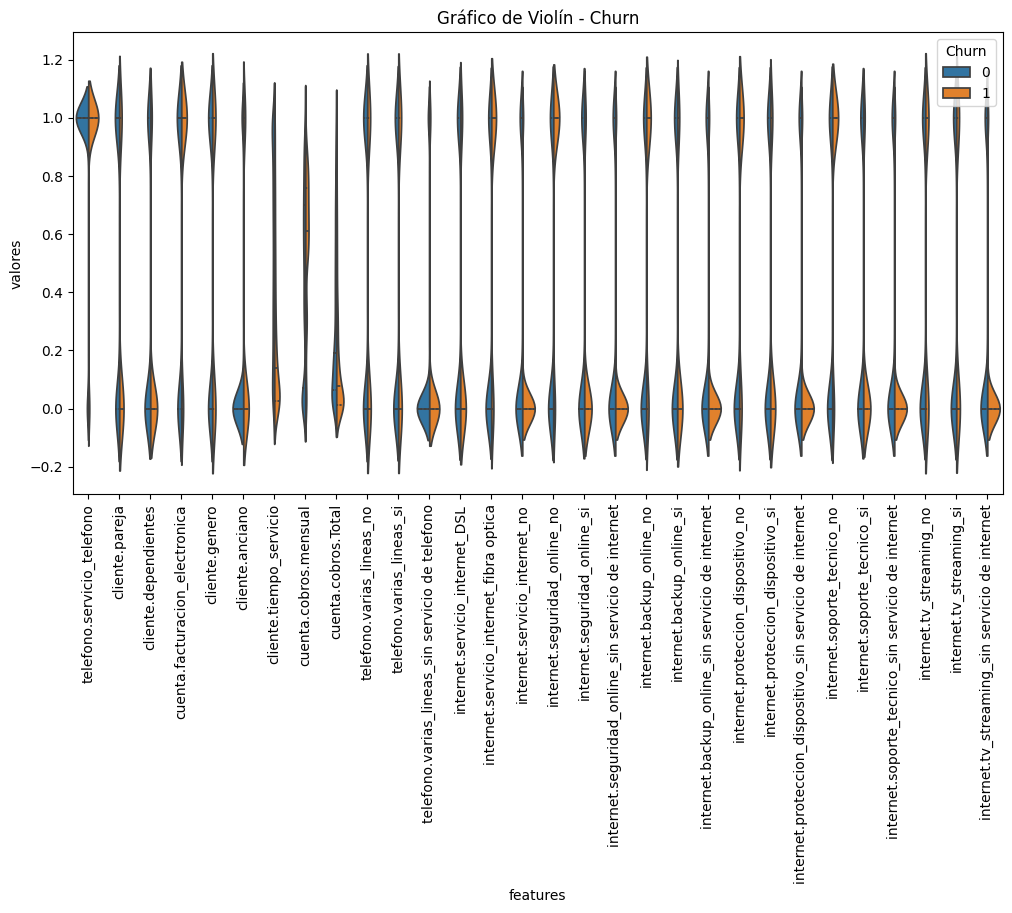

In [ ]:
# Diagrama de violín para las primeras 30 características
diagrama_violin(datos_churn, 0, 30)

### **Diagrama de Puntos**

In [ ]:
def diagrama_puntos(df, inicio, fin):
  # Identificamos las columnas numéricas
  num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
  num_cols.remove('Churn')  # Removemos la columna 'Churn' de las numéricas

  # Normalizamos las columnas numéricas para que estén en la misma escala
  scaler = MinMaxScaler()
  df[num_cols] = scaler.fit_transform(df[num_cols])

  # Seleccionamos el rango de columnas
  columnas_seleccionadas = num_cols[inicio:fin]

  # Creamos un DataFrame con la columna objetivo y las columnas seleccionadas
  df_seleccionado = pd.concat([df['Churn'], df[columnas_seleccionadas]], axis=1)

  # Derretimos el DataFrame para facilitar la graficación
  df_melted = pd.melt(df_seleccionado, id_vars="Churn", var_name="features", value_name='valores')

  # Creamos el gráfico con líneas conectadas
  plt.figure(figsize=(12, 6))
  sns.pointplot(x="features", y="valores", hue="Churn", data=df_melted, linestyles='-')
  plt.xticks(rotation=90)
  plt.title('Diagrama de Puntos - Churn')
  plt.show()


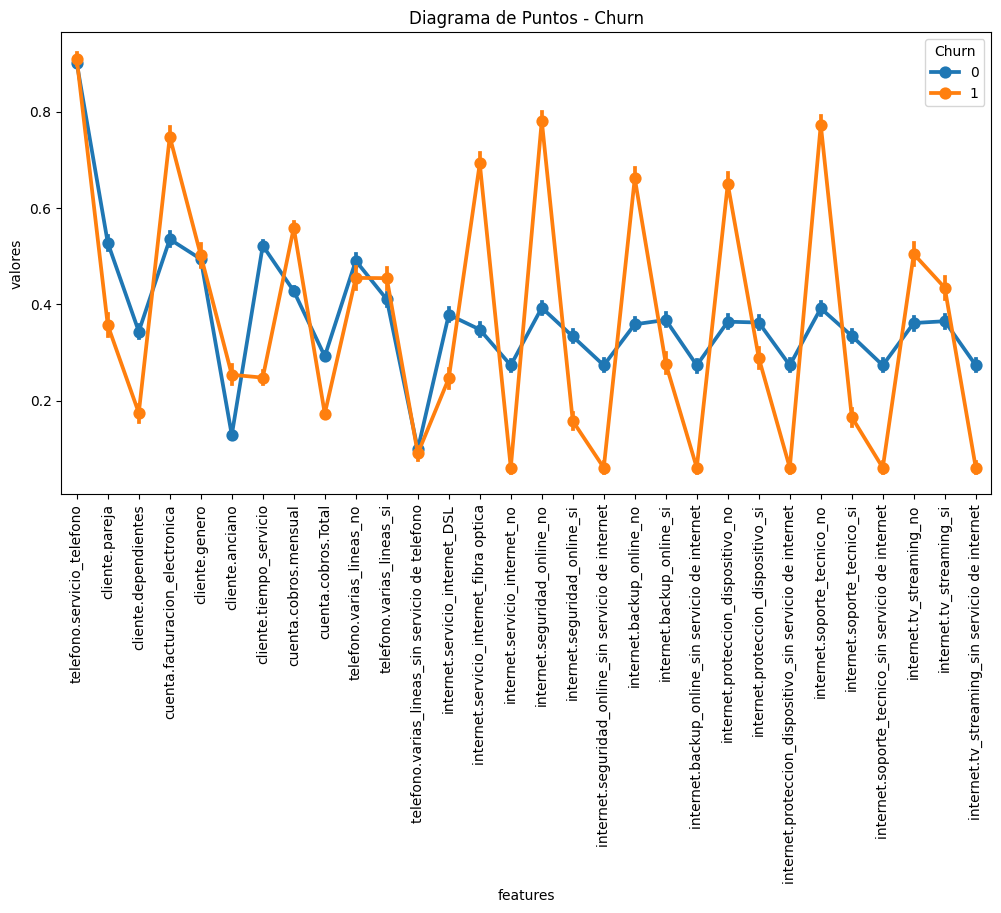

In [ ]:
# Diagrama de puntos para las primeras 30 características
diagrama_puntos(datos_churn, 0, 30)

In [ ]:
datos_churn.groupby('Churn')["cliente.anciano"].value_counts(normalize=True)

Churn  cliente.anciano
0      0.0                0.871187
       1.0                0.128813
1      0.0                0.746092
       1.0                0.253908
Name: proportion, dtype: float64

In [ ]:
datos_churn.groupby('Churn')["telefono.servicio_telefono"].value_counts(normalize=True)

Churn  telefono.servicio_telefono
0      1.0                           0.900913
       0.0                           0.099087
1      1.0                           0.909434
       0.0                           0.090566
Name: proportion, dtype: float64

In [ ]:
train_x = train_x.drop(columns=["telefono.servicio_telefono"])
test_x = test_x.drop(columns=["telefono.servicio_telefono"])
model = pronosticar(train_x, train_y)
model.score(test_x, test_y)

0.7848643503093765

- Accuracy: 0.785 (78.5%)
- Ligera mejora en el accuracy al eliminar la columna 'telefono.servicio_telefono'

##**4.2 Mapa de Calor**

In [ ]:
def mapa_calor(df):
  grafico = df.corr()
  plt.figure(figsize=(17,15))
  sns.heatmap(grafico, annot=True, fmt=".1f")
  return grafico

# mapa_calor(datos_churn)

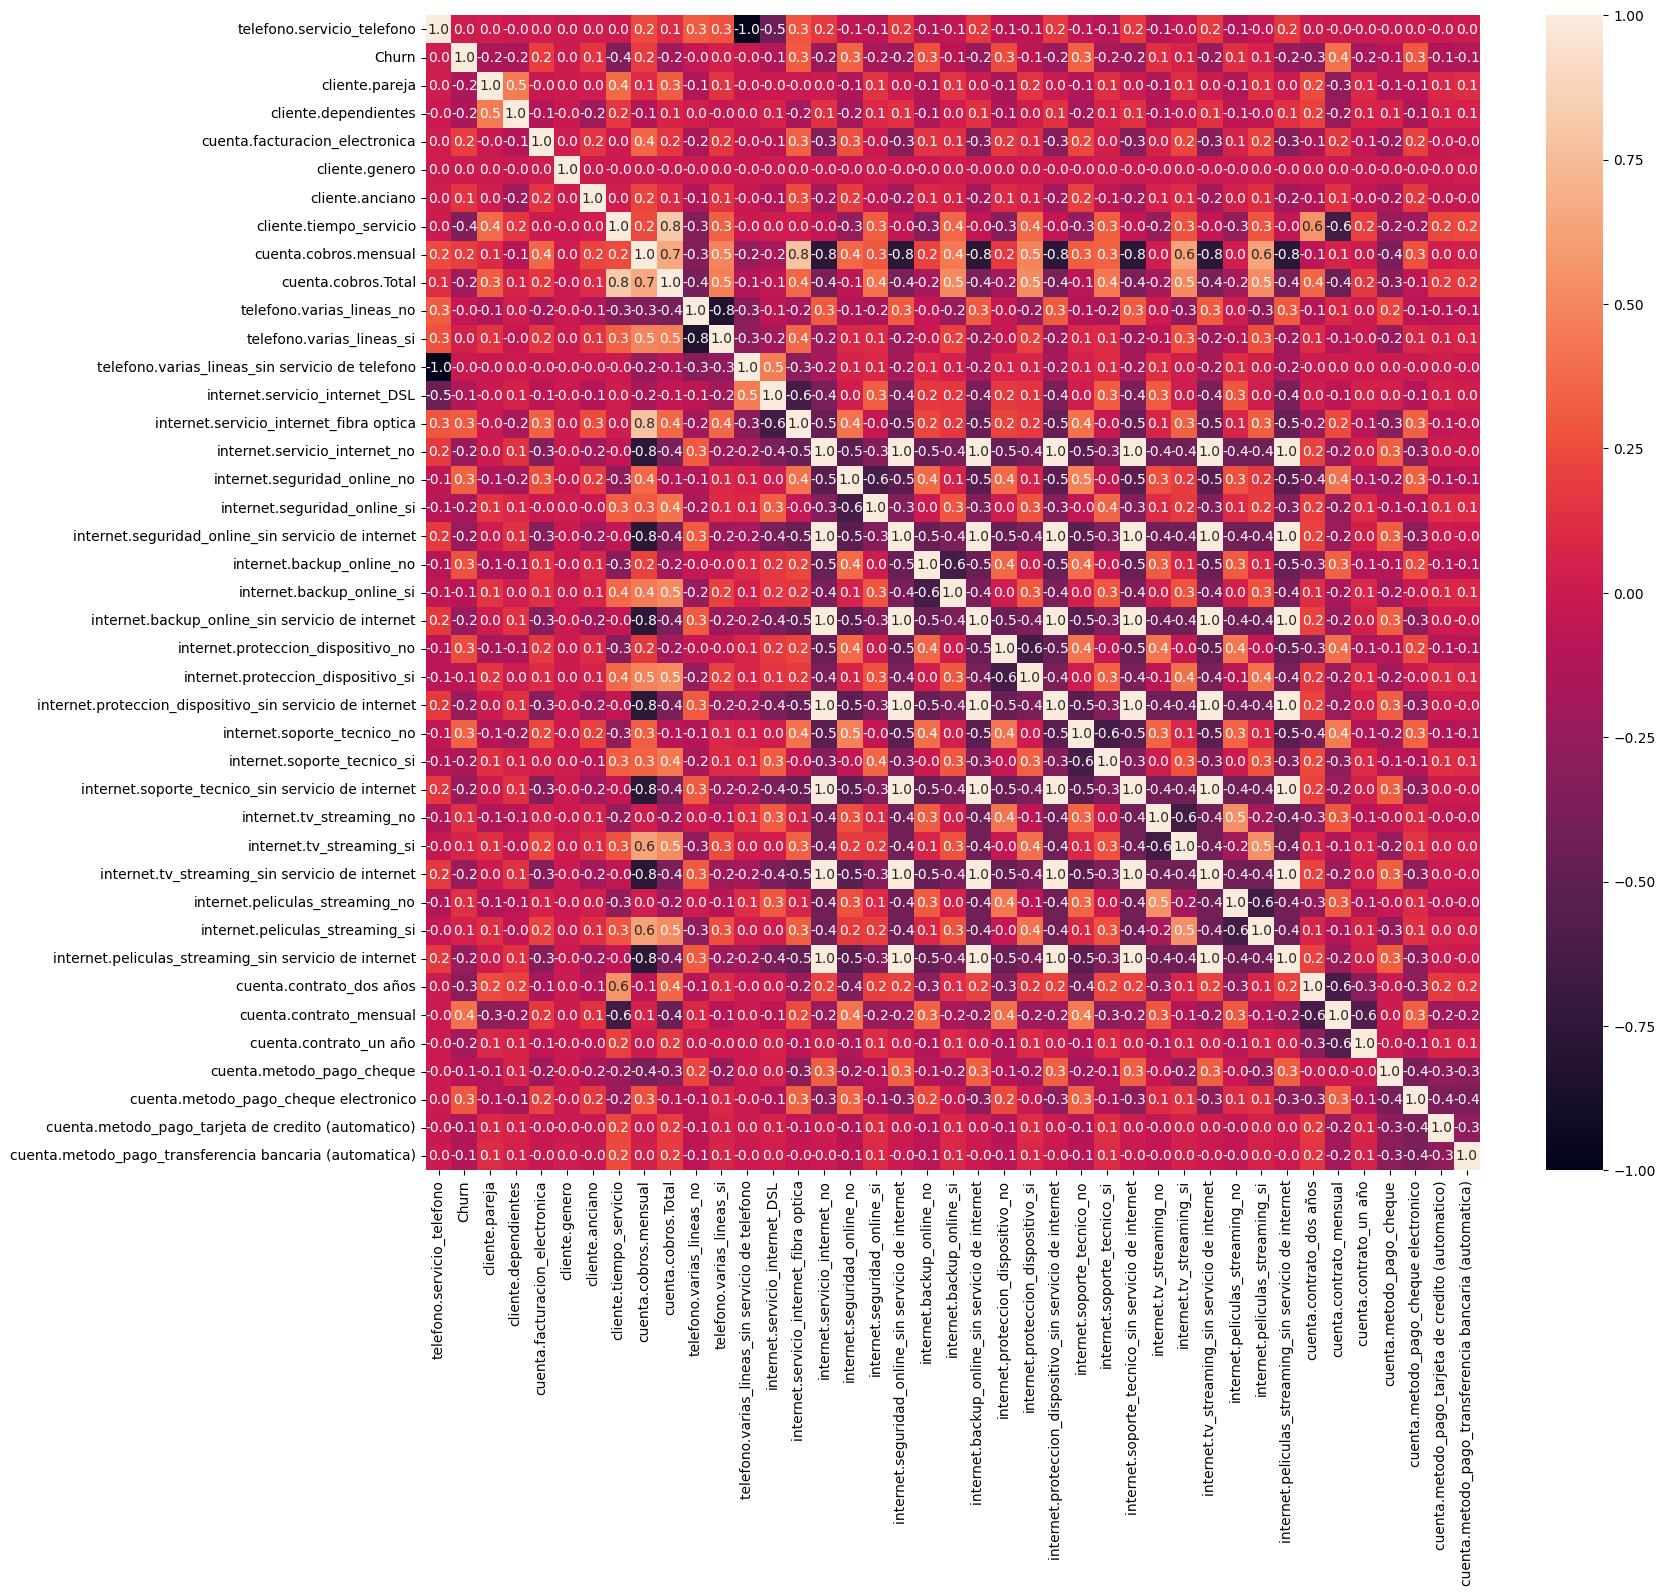

In [ ]:
matriz = mapa_calor(datos_churn)

In [ ]:
matriz2 = matriz>0.99
matriz2 = matriz2.sum()
matriz2[matriz2>1]

,0
internet.servicio_internet_no,7
internet.seguridad_online_sin servicio de internet,7
internet.backup_online_sin servicio de internet,7
internet.proteccion_dispositivo_sin servicio de internet,7
internet.soporte_tecnico_sin servicio de internet,7
internet.tv_streaming_sin servicio de internet,7
internet.peliculas_streaming_sin servicio de internet,7


In [ ]:
def identificar_variables(base):
  # Filtrar las variables con correlaciones mayores a 1
  variables_redundantes = base.index

  # Retornar los nombres de las variables como una lista
  return list(variables_redundantes)

In [ ]:
identificar_variables(matriz2[matriz2>1])

['internet.servicio_internet_no',
 'internet.seguridad_online_sin servicio de internet',
 'internet.backup_online_sin servicio de internet',
 'internet.proteccion_dispositivo_sin servicio de internet',
 'internet.soporte_tecnico_sin servicio de internet',
 'internet.tv_streaming_sin servicio de internet',
 'internet.peliculas_streaming_sin servicio de internet']

In [ ]:
train_x = train_x.drop(columns=['internet.servicio_internet_no','internet.seguridad_online_sin servicio de internet','internet.backup_online_sin servicio de internet','internet.proteccion_dispositivo_sin servicio de internet','internet.soporte_tecnico_sin servicio de internet','internet.tv_streaming_sin servicio de internet','internet.peliculas_streaming_sin servicio de internet'])
test_x = test_x.drop(columns=['internet.servicio_internet_no','internet.seguridad_online_sin servicio de internet','internet.backup_online_sin servicio de internet','internet.proteccion_dispositivo_sin servicio de internet','internet.soporte_tecnico_sin servicio de internet','internet.tv_streaming_sin servicio de internet','internet.peliculas_streaming_sin servicio de internet'])
model = pronosticar(train_x, train_y)
model.score(test_x,test_y)

0.7843883864826273

- Accuracy: 78.4% (0.784)
- Similar al método anterior (Métodos Gráficos). La diferencia está en que optamos por omitir 7 características, que tienen más de una correlación alta con otras variables

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4901 entries, 2798 to 5808
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   cliente.pareja                                          4901 non-null   int64
 1   cliente.dependientes                                    4901 non-null   int64
 2   cuenta.facturacion_electronica                          4901 non-null   int64
 3   cliente.genero                                          4901 non-null   int64
 4   cliente.anciano                                         4901 non-null   int64
 5   cliente.tiempo_servicio                                 4901 non-null   int64
 6   cuenta.cobros.mensual                                   4901 non-null   int64
 7   cuenta.cobros.Total                                     4901 non-null   int64
 8   telefono.varias_lineas_no                               4901

##**4.3 Feature Importances**

### **SelectKBest**

In [ ]:
def pronosticar_kbest(train_x, test_x, train_y, test_y):
  # Aplicamos SelectKBest con chi-cuadrado
  selector = SelectKBest(score_func=chi2, k=10)
  train_x_selected = selector.fit_transform(train_x, train_y)
  test_x_selected = selector.transform(test_x)

  # Entrenamos un modelo con las características seleccionadas
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x_selected, train_y)

  # Evaluamos el modelo en el conjunto de prueba
  test_score = model.score(test_x_selected, test_y)
  print(f'Accuracy en prueba con SelectKBest y chi2: {test_score}')

  # Visualizamos las características seleccionadas
  mask = selector.get_support()  # Se obtiene un arreglo booleano de las características seleccionadas
  selected_features = train_x.columns[mask]
  print(f'Características seleccionadas: {list(selected_features)}')

In [ ]:
pronosticar_kbest(train_x, test_x, train_y, test_y)

Accuracy en prueba con SelectKBest y chi2: 0.7843883864826273
Características seleccionadas: ['cliente.tiempo_servicio', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.backup_online_no', 'internet.soporte_tecnico_no', 'cuenta.contrato_dos años', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque electronico']


- Accuracy: 78.4% (0.784)
- Este método ofrece un mejor resultado, seleccionando 10 características claves relacionadas con el tiempo de servicio, cobros y características del servicio de Internet

### **RFE (Recursive Feature Elimination)**

In [ ]:
def pronosticar_RFE(train_x, test_x, train_y, test_y):
  # Instancia del modelo
  model = RandomForestClassifier(random_state=50)

  # Aplicamos RFE con n características a seleccionar
  selector = RFE(estimator=model, n_features_to_select=10, step=1)

  # Ajustamos RFE en el conjunto de entrenamiento
  train_x_selected = selector.fit_transform(train_x, train_y)
  test_x_selected = selector.transform(test_x)

  # Entrenamos el modelo con las características seleccionadas
  model.fit(train_x_selected, train_y)

  # Evaluamos el modelo en el conjunto de prueba
  test_score = model.score(test_x_selected, test_y)
  print(f'Accuracy en prueba con RFE: {test_score}')

  # Visualizamos las características seleccionadas
  mask = selector.support_  # Se obtiene un arreglo booleano de las características seleccionadas
  selected_features = train_x.columns[mask]
  print(f'Características seleccionadas: {list(selected_features)}')

In [ ]:
pronosticar_RFE(train_x, test_x, train_y, test_y)

Accuracy en prueba con RFE: 0.7848643503093765
Características seleccionadas: ['cuenta.facturacion_electronica', 'cliente.genero', 'cliente.tiempo_servicio', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.soporte_tecnico_no', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque electronico']


- Accuracy: 78.4% (0.784)
- Comportamiento similar a los métodos anteriores, pero con una selección más refinada de 10 características.

### **RFECV (Recursive Feature Elimination with Cross-Validation)**

In [ ]:
def pronosticar_RFECV(train_x, test_x, train_y, test_y):
  # Creamos el clasificador
  model = RandomForestClassifier(random_state=50)

  # Definimos la estrategia de validación cruzada
  cv = StratifiedKFold(n_splits=5)

  # Aplicamos RFECV para seleccionar características importantes
  selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

  # Ajustamos el selector a los datos de entrenamiento
  selector.fit(train_x, train_y)

  # Se transforma los conjuntos de entrenamiento y prueba
  train_x_selected = selector.transform(train_x)
  test_x_selected = selector.transform(test_x)

  # Entrenamos el modelo con las características seleccionadas
  model.fit(train_x_selected, train_y)

  # Evaluamos el modelo en los datos de prueba
  test_score = model.score(test_x_selected, test_y)
  print(f'Accuracy en prueba con RFECV: {test_score}')

  # Visualizamos las características seleccionadas
  mask = selector.support_  # Se obtiene un arreglo booleano de las características seleccionadas
  selected_features = train_x.columns[mask]
  print(f'Características seleccionadas: {list(selected_features)}')

In [ ]:
pronosticar_RFECV(train_x, test_x, train_y, test_y)

Accuracy en prueba con RFECV: 0.7877201332698714
Características seleccionadas: ['cliente.pareja', 'cliente.dependientes', 'cuenta.facturacion_electronica', 'cliente.genero', 'cliente.anciano', 'cliente.tiempo_servicio', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'telefono.varias_lineas_no', 'telefono.varias_lineas_si', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.backup_online_no', 'internet.proteccion_dispositivo_no', 'internet.soporte_tecnico_no', 'internet.tv_streaming_si', 'internet.peliculas_streaming_no', 'cuenta.contrato_dos años', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque electronico', 'cuenta.metodo_pago_tarjeta de credito (automatico)', 'cuenta.metodo_pago_transferencia bancaria (automatica)']


- Accuracy: 78.8% (0.788)
- Selección más robusta con validación cruzada, identificando 22 características importantes.
- Buen equilibrio entre performance y número de características

### **PCA (Principal Component Analysis)**

In [ ]:
def pronosticar_PCA(train_x, test_x, train_y, test_y):
  # Aplicamos PCA
  pca = PCA(n_components=10)
  train_x_pca = pca.fit_transform(train_x)
  test_x_pca = pca.transform(test_x)

  # Entrenamos el modelo
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x_pca, train_y)

  # Evaluamos el modelo en los datos de prueba
  test_score = model.score(test_x_pca, test_y)
  print(f'Accuracy en prueba con PCA: {test_score}')

In [ ]:
pronosticar_PCA(train_x, test_x, train_y, test_y)

Accuracy en prueba con PCA: 0.7815326035221323


- Accuracy: 78.2% (0.782)
- Aunque reduce la dimensionalidad, el accuracy es similar al Random Forest sin reducción, indicando que el modelo podría estar capturando suficiente información con menos dimensiones

#**5. Conclusiones**


---

- El método RFECV (0.788) presenta la mayor precisión, seguido de RFE (0.785) y el diagrama de puntos (0.785). Esto indica que una eliminación meticulosa de características mediante validación cruzada puede optimizar el rendimiento del modelo.
- La PCA (0.782) es efectiva para la reducción de dimensionalidad y la optimización de la eficiencia computacional; sin embargo, su aplicación no mejora el rendimiento en relación con otros métodos disponibles.
- La técnica SelectKBest y la eliminación de columnas con valores irrelevantes (0.784) son opciones efectivas que no afectan negativamente el rendimiento, aunque tampoco contribuyen a una mejora notable.